In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and Clean the Dataset

# Load the XLS file into a pandas DataFrame
# The file should be uploaded to your Colab session.
file_path = 'CommMktArrivals2012.xls'
df = pd.read_excel(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,District Name,Taluk Name,Market Name,Address,Telephone,Commodity,Year,Month,Arrival,Unit
0,Bagalakot,Badami,BADAMI,SECRATRY A.P.M.C.BADAMI BADAMI,220042,Bajra,2012,Jan,242,Quintal
1,Bagalakot,Badami,BADAMI,SECRATRY A.P.M.C.BADAMI BADAMI,220042,Bull,2012,Jan,65,Numbers
2,Bagalakot,Badami,BADAMI,SECRATRY A.P.M.C.BADAMI BADAMI,220042,Cow,2012,Jan,151,Numbers
3,Bagalakot,Badami,BADAMI,SECRATRY A.P.M.C.BADAMI BADAMI,220042,Goat,2012,Jan,492,Numbers
4,Bagalakot,Badami,BADAMI,SECRATRY A.P.M.C.BADAMI BADAMI,220042,Groundnut,2012,Jan,364,Quintal


In [18]:

# Data Cleaning
df.columns = df.columns.str.strip()

# Strip whitespace
for col in df.select_dtypes(['object']).columns:
    df[col] = df[col].str.strip()
df['Arrival'] = pd.to_numeric(df['Arrival'], errors='coerce')
df.dropna(subset=['Arrival'], inplace=True)
#data to only include arrivals measured in 'Quintal'
df_quintal = df[df['Unit'] == 'Quintal'].copy()


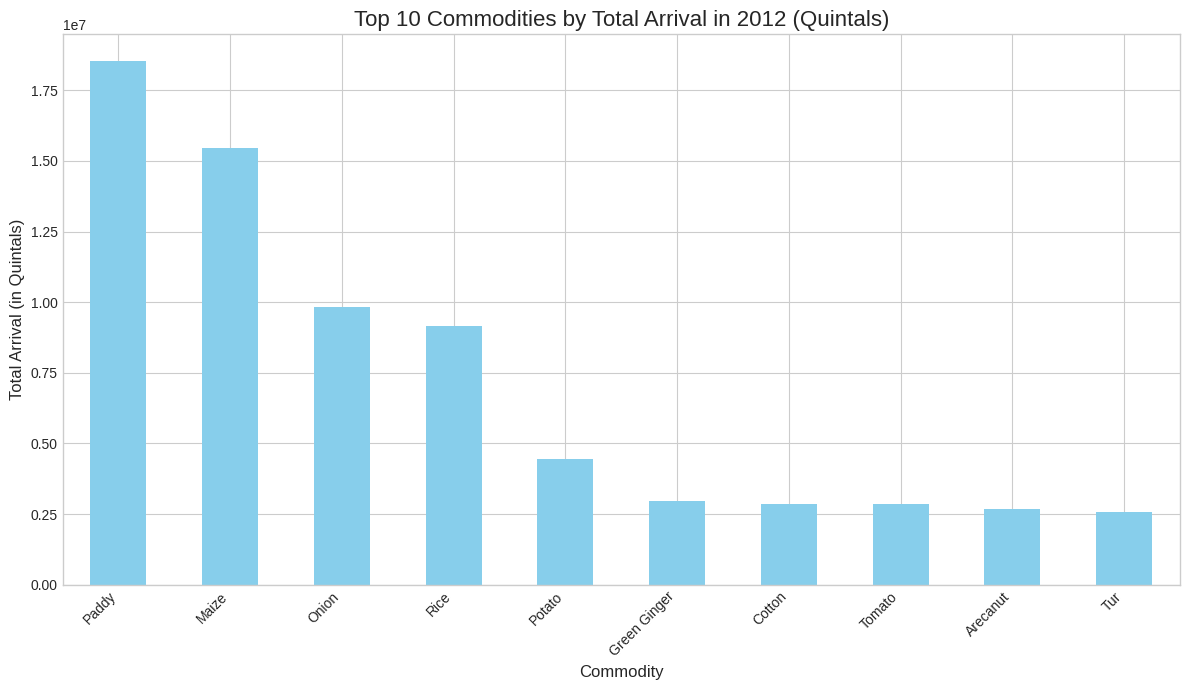

In [19]:

# Perform Basic Analysis and Create Plots

plt.style.use('seaborn-v0_8-whitegrid')

# Bar Plot: Top 10 Commodities by Total Arrival
# This plot helps us in identify the most significant commodities in the dataset.

# Group by commodity and sum the arrivals, then get  top 10
top_10_commodities = df_quintal.groupby('Commodity')['Arrival'].sum().nlargest(10)

#plot
plt.figure(figsize=(12, 7))
top_10_commodities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Commodities by Total Arrival in 2012 (Quintals)', fontsize=16)
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Total Arrival (in Quintals)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


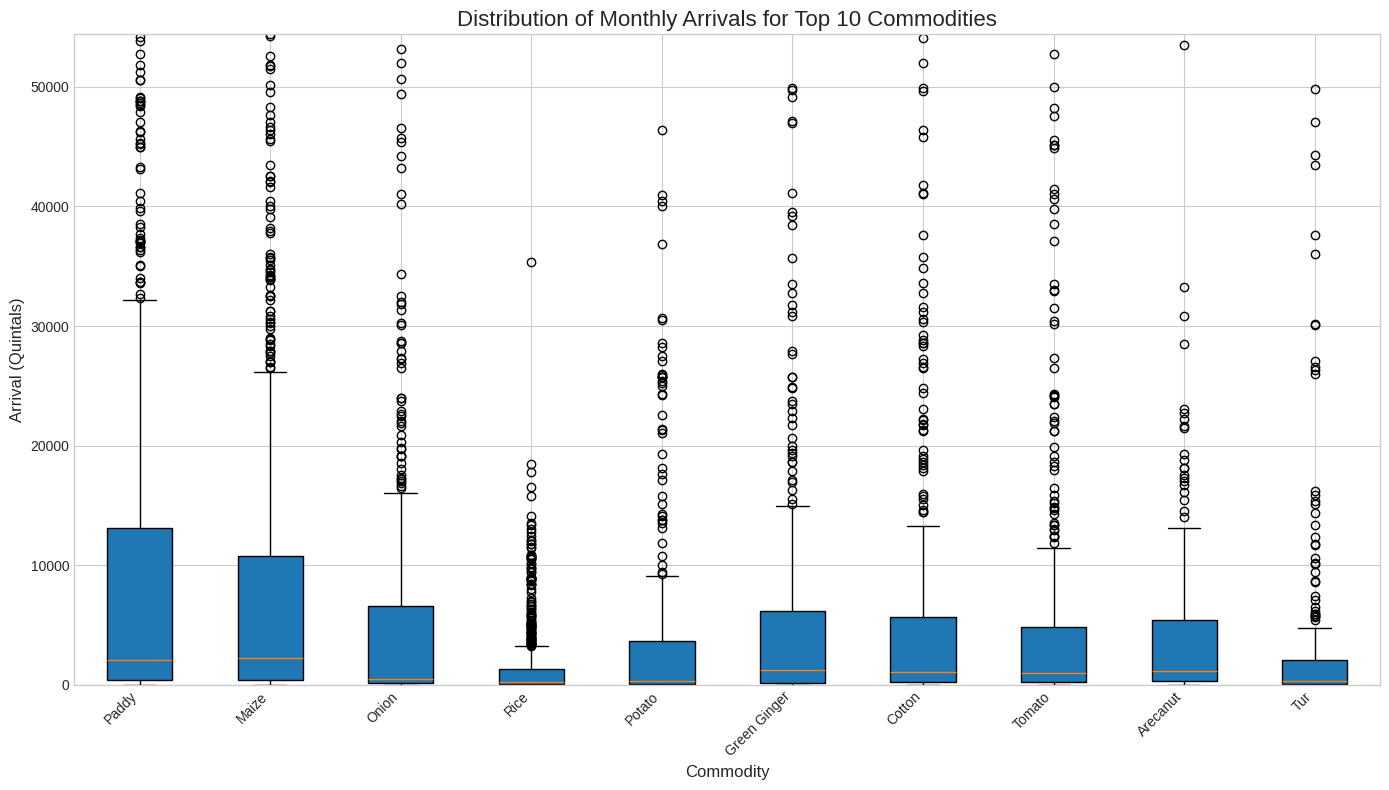

In [20]:
# Box Plot: Distribution of Arrivals for Top 10 Commodities

# lets take top 10 commodities
df_top_10 = df_quintal[df_quintal['Commodity'].isin(top_10_commodities.index)].copy()

plt.figure(figsize=(14, 8))
data_to_plot = [df_top_10['Arrival'][df_top_10['Commodity'] == commodity] for commodity in top_10_commodities.index]

plt.boxplot(data_to_plot, patch_artist=True)
plt.title('Distribution of Monthly Arrivals for Top 10 Commodities', fontsize=16)
plt.xlabel('Commodity', fontsize=12)
plt.ylabel('Arrival (Quintals)', fontsize=12)
plt.xticks(ticks=range(1, len(top_10_commodities.index) + 1), labels=top_10_commodities.index, rotation=45, ha='right')
# Setting a y-limit to exclude extreme outliers to better visualize the boxes
plt.ylim(0, df_top_10['Arrival'].quantile(0.95)) # Show up to 95th percentile
plt.tight_layout()
plt.show()



/tmp/ipython-input-1885710537.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_commodity['Month'] = pd.Categorical(df_top_commodity['Month'], categories=month_order, ordered=True)
/tmp/ipython-input-1885710537.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_arrivals = df_top_commodity.groupby('Month')['Arrival'].sum()


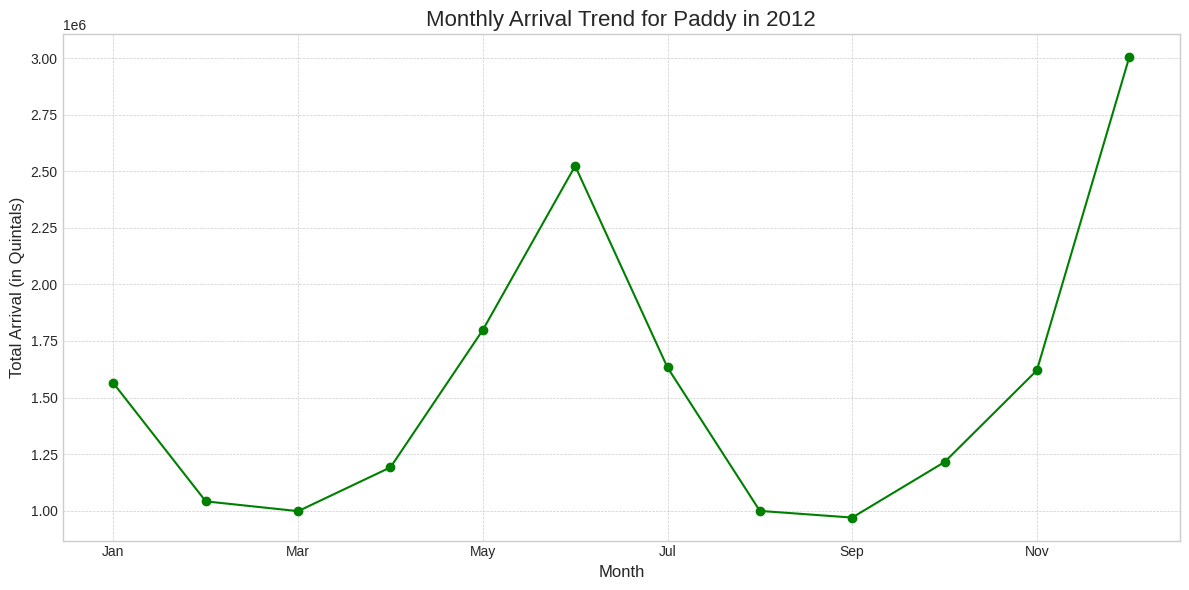

In [21]:

# Line Plot: Monthly Arrival Trend for the Top Commodity


top_commodity_name = top_10_commodities.index[0]

df_top_commodity = df_quintal[df_quintal['Commodity'] == top_commodity_name]


month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_top_commodity['Month'] = pd.Categorical(df_top_commodity['Month'], categories=month_order, ordered=True)

# Group by month and sum the arrivals
monthly_arrivals = df_top_commodity.groupby('Month')['Arrival'].sum()

plt.figure(figsize=(12, 6))
monthly_arrivals.plot(kind='line', marker='o', color='green')
plt.title(f'Monthly Arrival Trend for {top_commodity_name} in 2012', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Arrival (in Quintals)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



/tmp/ipython-input-1685226441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_commodity['Month_Num'] = df_top_commodity['Month'].map(month_to_num)


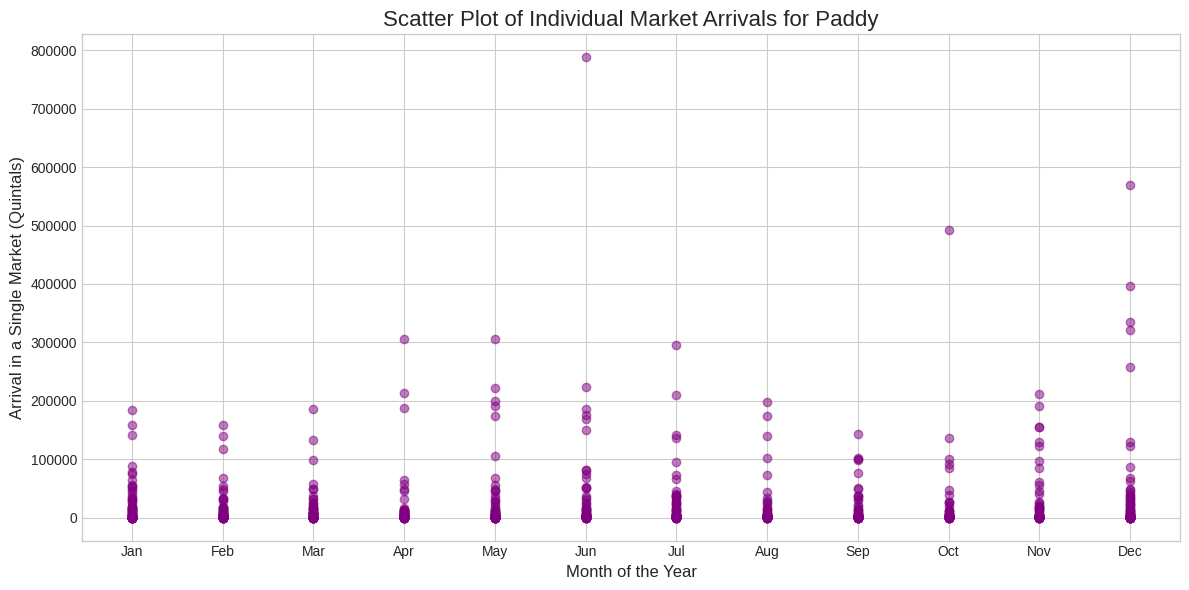

In [22]:

# Scatter Plot: Monthly Arrivals of a Commodity
month_to_num = {name: i+1 for i, name in enumerate(month_order)}
df_top_commodity['Month_Num'] = df_top_commodity['Month'].map(month_to_num)

plt.figure(figsize=(12, 6))
plt.scatter(df_top_commodity['Month_Num'], df_top_commodity['Arrival'], alpha=0.5, color='purple')
plt.title(f'Scatter Plot of Individual Market Arrivals for {top_commodity_name}', fontsize=16)
plt.xlabel('Month of the Year', fontsize=12)
plt.ylabel('Arrival in a Single Market (Quintals)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=month_order) # Set x-axis ticks to show month names
plt.tight_layout()
plt.show()